In [1]:
#SEDRAN Romain Sujet 1a

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

Populating the interactive namespace from numpy and matplotlib


# Exercice 1

Une usine fabrique deux sortes de produits, $x_1$ et $x_2$, à l’aide de deux machines m1 et m 2 .
Chaque kilogramme de produit en cours de fabrication doit passer successivement sur les
deux machines dans un ordre indifférent et pendant les temps $a_{ij}$ suivants (en minutes) :

|`  `| $x_1$ | $x_2$ |
|----|----|----|
| m1 | $a_{11}$ | $a_{12}$ |
| m2 | $a_{21}$ | $a_{22}$ |

De plus, la machine m1 est disponible $b_1$ minutes par mois et la machine m2 est
disponible $b_2$ minutes par mois. Le profit réalisé sur un kilogramme du produit $x_1$ est
de $c_1$ euros. Le profit réalisé sur un kilogramme du produit $x_2$ est de $c_2$ euros. On
souhaite trouver le plan mensuel de fabrication qui maximise le profit.

$$
(P)\quad\left\{
\begin{array}{ll}
\max                          & c_1 x_1 + c_2 x_2
\\
\mbox{sous les contraintes :} & (x_1,x_2)\in{\mathbb{R}}^2
\\
                              & a_{11} x_1 + a_{12} x_2 \leq b_1
                              \\
                              & a_{21} x_1 + a_{22} x_2 \leq b_2
                              \\
                              & x_1,x_2\geq 0
\end{array}
\right.
$$


## 1 - Résolution graphique

Etant données les valeurs numériques de $a_{ij}$, $b_j$ et $c_i$ définies sur votre copie papier, tracer toutes les contraintes du problème (P), les contours de sa fonction objectif et en déduire une valeur (au moins approximative) de la solution $x^*$ de $(P)$.

#c1 = 400, c2 = 200

In [3]:
Lx1 = np.arange(0,150)
Lx2 = np.arange(-200,500)
X,Y = np.meshgrid(Lx1,Lx2)
Z = 400*X+200*Y   #c1*X+c2*Y

#b1 = 6000,b2 = 4000,  a11 = 30, a12 = 20, a21 = 40, a22 = 10
#x2 <= (b1-a11*x1)/a12    
#x2<= (b2-a21*x1)/a22

In [4]:
Ly1 = (6000-30*Lx1)/(20)
Ly2 = (4000-40*Lx1)/(10)

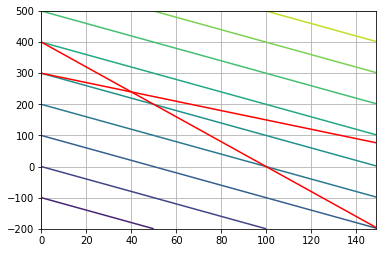

In [5]:
plt.contour(X,Y,Z,10)
plt.plot(Lx1,Ly1,color='red')
plt.plot(Lx1,Ly2,color='red')
plt.grid()

D'après le graphique ci dessus, nous pouvons déduire une solution approximative de x* = (40,250). Cela veut dire que pour faire le bénéfice maximal nous devons vendre environ 40 kilogramme du produit x1 et environ 250 kilogrammes du produit x2.

## 2 - Résolution précise

Trouver la solution de $(P)$ en utilisant la fonction **linprog** de la librairie **scipy.optimize** et comparer au résultat approximatif obtenu ci-dessus.

In [6]:
#On transforme le max par un min
c = [-400,-200]
A = [[30,20],
     [40,10]]
b = [6000,4000]
res = linprog(c, A_ub=A, b_ub=b,options={"disp": True})
print(res)

Optimization terminated successfully.
         Current function value: -64000.000000
         Iterations: 2
     fun: -64000.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([ 40., 240.])


Lorsque nous faisons le calcul avec linprog,le résultat que nous obtenons pour le x* optimal est x* = (40,240). Cela veut dire que pour faire le bénéfice maximal nous devons vendre 40 kilogrammes de produit x1 et 240 kilogrammes du produit x2. Nous ferons un bénéfice de 64000 euros. Les résultats obtenus avec linprog sont quasiment les mêmes que ceux lus sur le graphique ci dessus donc afficher le contour de la fonction ainsi que ses contraintes nous permet d'avoir une solution presque exacte du problème par le graphique.

# Exercice 2

Etant données les paramètres $a_1$ et $a_2$ définis sur votre copie papier, on note 
$
f(x) := (x_1^2+x_2-a_1)^2+(x_1+x_2^2-a_2)^2
$
et on considère le problème d'optimisation 
$$
(Q)\quad \displaystyle\min_{x\in\mathbb{R}^2} f(x).
$$

## 1 - Résolution

Résoudre ce problème d'optimisation $(Q)$ en utilisant la méthode de gradient à pas fixe que vous avez programmée pendant les séances de TP, avec $\alpha=0.01$ et $itmax=200$. 

On partira du point de départ $x_0$ donné sur votre copie papier et on fera afficher l'optimum trouvé.

In [7]:
#Calcul du gradient de f, ici 
#gradient f = (2*x1*2*(x1^2+x2-a1)+2*(x1+x2^2-a2), 
              #2*(x1^2+x2-a1)+2*x2*2*(x1+x2^2-a2))

In [8]:
def GPF(x0,f,df,alpha,itmax):
    x = [x0]
    liste_gradient = []
    for i in range(0,itmax):
        gradient = df(x[i])
        gradient_neg = -1*np.array(gradient)
        a_d = alpha*np.array(gradient_neg)
        x.append(list(np.add(x[i],a_d)))
        liste_gradient.append(list(gradient))
    return(x,liste_gradient)
def df(x):
    a1 = 11
    a2 = 7
    return(4*x[0]*(x[0]**2+x[1]-a1)+2*(x[0]+x[1]**2-a2),2*(x[0]**2+x[1]-a1)+4*x[1]*(x[0]+x[1]**2-a2))
def f(x) :
    a1 = 11
    a2 = 7
    return((x[0]**2+x[1]-a1)**2+(x[0]+x[1]**2-a2)**2)

In [9]:
x0 = [0,0]
alpha = 0.01
itmax=200
x_res,liste_gradient = GPF(x0,f,df,alpha,itmax)
x_res = np.array(x_res)
liste_gradient = np.array(liste_gradient)

In [10]:
#affichage de l'optimum : 
print(x_res[itmax])

[3. 2.]


## 2 - Premiers tracés

### a - Sur un même graphe, tracer les contours de la fonction objectif $f$, ainsi que les itérés obtenus.

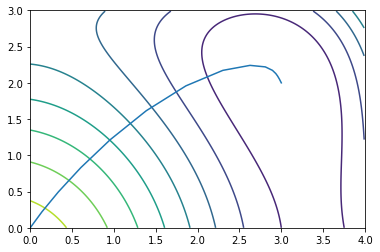

In [11]:
x = np.arange(0,4,0.01)
y = np.arange(0,3,0.01)
X,Y = np.meshgrid(x,y)
Z = f([X,Y])
plot(x_res[:,0],x_res[:,1])
xlim(0,4)
ylim(0,3)
contour(X,Y,Z,10)

### b - Tracer maintenant l'évolution de la norme du gradient de $f$ au cours des itérations.

In [12]:
#On remarque que dès la 15 ème itération notre norme tend vers 0

In [13]:
liste_norme = sqrt(liste_gradient[:,0]**2 + liste_gradient[:,1]**2)

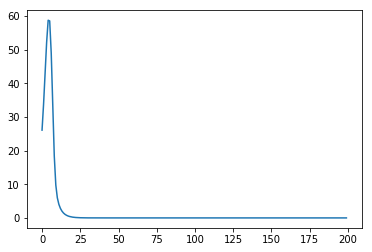

In [14]:
plt.plot(liste_norme)
plt.show()

## 3 - Méthode de Newton

### a - Mise en oeuvre

On rappelle que la méthode de Newton pour minimiser une fonction $f : \mathbb{R}^n \to \mathbb{R}$ est 
de se donner un point de départ $x_0 \in \mathbb{R}^n$
et de construire la suite suivante : 
$$
x_{k+1} = x_k+d_k^N 
\quad\mbox{où } d_k^N \mbox{ est solution du système linéaire }\quad 
\nabla^2 f(x_k) d = -\nabla f(x_k).
$$

Mettre en oeuvre cette méthode et l'utiliser pour résoudre le problème $(Q)$. On prendra comme critère d'arrêt $\|x_{k+1}-x_k\|<10^{-12}$.

On partira du point de départ $x_0$ donné sur votre copie papier et on fera afficher l'optimum trouvé.

Indication : on pourra utiliser *linalg.solve* pour résoudre un système linéaire.

In [15]:
#On calcule tout d'abord le Hessien de f du problème Q. 
#gradient f = (2*x1*2*(x1^2+x2-a1)+2*(x1+x2^2-a2), 
              #2*(x1^2+x2-a1)+2*x2*2*(x1+x2^2-a2))
    
#gradient f = (4*x1^3+4*x1*x2-4*x1*a1+2*x1+2*x2^2-2*a2), 
              #2*x1^2+2*x2-2*a1+4*x2*x1+4*x2^3-4*x2*a2)
    
#Hessien f = ((12*x1^2+4*x2-4*a1+2), (4*x1+4*x2),
            #(4*x1+4*x2), (2+4*x1+12*x2^2-4*a2))

In [16]:
def Hessien(x):
    a1 = 11
    a2 = 7
    return([[12*x[0]**2+4*x[1]-4*a1+2,4*x[0]+4*x[1]],[4*x[0]+4*x[1],12*x[1]**2+4*x[0]-4*a2+2]])

In [17]:
def Newton(x0,f,df,alpha,itmax):
    x = [x0]
    for i in range(0,itmax):
        gradient = df(x[i])
        gradient_neg = -1*np.array(gradient)
        hessien_calcule = Hessien(x[i])
        dk = linalg.solve(hessien_calcule,gradient_neg)
        x.append(list(x[i]+dk))
    return(x)

In [18]:
x0 = [0,0]
alpha = 0.01
itmax=200
x_res = np.array(Newton(x0,f,df,alpha,itmax))

In [19]:
print(x_res[itmax])

[-0.27084459 -0.92303856]


### b - Tracer l'évolution de la norme de $x_{k+1}-x_k$ au cours des itérations de la méthode de Newton.

In [20]:
x = np.matrix(Hessien(x0))